In [1]:
import nilearn
from nilearn import plotting

In [4]:
basepath = "D:/JCM ELEKTRO ITS/Disertasi/Datasets/Brain Tumor/Pre-operative_TCGA_GBM_NIfTI_and_Segmentations/TCGA-02-0006/"

<h2>Loading and Plotting Nifti Data of Brain Tumor Using NiLearn</h2>

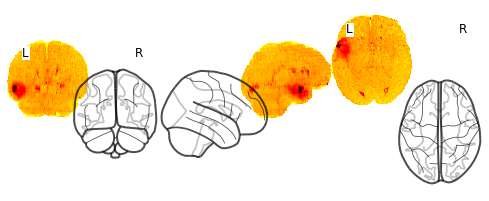

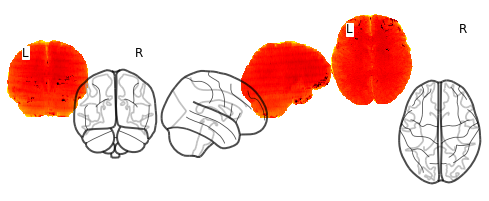

In [27]:
plotting.plot_glass_brain(basepath+"/TCGA-02-0006_1996.08.23_flair.nii.gz")
plotting.plot_glass_brain(basepath+"/TCGA-02-0006_1996.08.23_t1.nii.gz")

<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine: 
[[ -1.   0.   0.  -0.]
 [  0.  -1.   0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 669.5108
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern

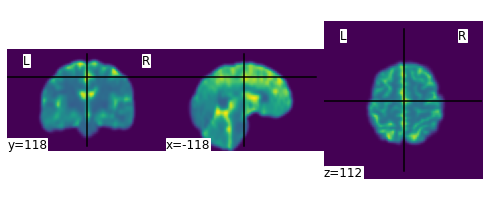

In [28]:
from nilearn import image
smoothed_img = image.smooth_img(basepath+"TCGA-02-0006_1996.08.23_t2.nii.gz", fwhm=5)  
plotting.plot_img(smoothed_img)
print (smoothed_img)

<h2>Loading and Plotting Nifti Data of Brain Tumor Using NiBabel</h2>

In [2]:
import os
import nibabel as nib
from nibabel.testing import data_path
import numpy as np
import cv2 
from matplotlib import pyplot as plt 

In [20]:
example_image = os.path.join(basepath,'TCGA-02-0006_1996.08.23_t2.nii.gz')
n1_image = nib.load(example_image) #load nifti file
nii_image = n1_image.get_data() #get image data from the niftii file
image_shape = nii_image.shape #see the shape of image data
print(image_shape)
print(n1_image)

(240, 240, 155)
<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine: 
[[ -1.   0.   0.  -0.]
 [  0.  -1.   0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scan

50


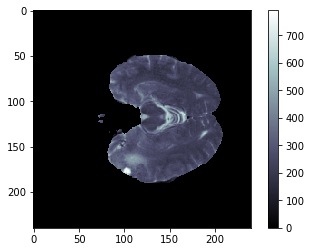

51


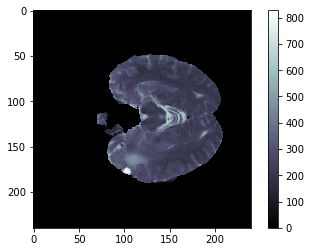

In [15]:
#See image per slice, lets see slice 50 to 52
for i in range(50,52):
    print(i)
    plt.imshow(nii_image[:,:,i], cmap=plt.cm.bone) 
    plt.colorbar() 
    plt.show() 

center of x: 119
center of y: 119
center of z: 77
Center Voxel Value:  381


Text(0.5, 0.98, 'Center slices for EPI image')

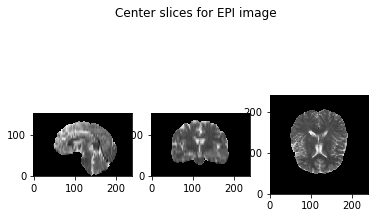

In [19]:
#find the center of brain image
center_x =(image_shape[0] -1)//2
center_y =(image_shape[1] -1)//2
center_z =(image_shape[2] -1)//2
print("center of x: "+ str(center_x) +"\ncenter of y: "+ str(center_x) +"\ncenter of z: "+ str(center_z))
print("Center Voxel Value: ", nii_image[center_x, center_y, center_z])

def show_slices(slices):
    # """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = nii_image[center_x, :, :]
slice_1 = nii_image[:, center_y, :]
slice_2 = nii_image[:, :, center_z]

show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

<h2>Load Brain Tumor Mask</h2>

In [5]:
example_mask = os.path.join(basepath,'TCGA-02-0006_1996.08.23_GlistrBoost_ManuallyCorrected.nii.gz')
n1_mask = nib.load(example_mask) #load nifti file
nii_mask = n1_mask.get_data() #get image data from the niftii file
maskshape = nii_mask.shape #see the shape of image data
print(maskshape)

(240, 240, 155)


In [6]:
print(n1_mask.header) #see metadata of niftii data using nibabel

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : -0.0
qoffset_y       : 239.0
qoffset_z       : 0.0
srow_x          : [-1. -0. -0. -0.]
srow_y          : 

<h2>Let's take a look on some of the Brain Tumor Mask image slices</h2>

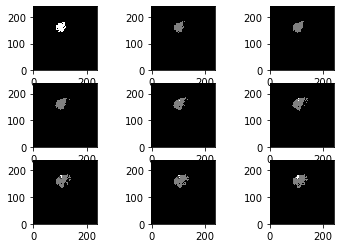

In [69]:
fig = plt.figure()
i=0
for k in range(37,46):
    ax = fig.add_subplot(3, 3, i+1) # this line adds sub-axes
    i=i+1
    ax.imshow(nii_mask[:,:,k], cmap="gray", origin="lower") # this line creates the image using the pre-defined sub axes

<h2>Getting Largest Area of Tumor</h2>

In [70]:
largest_area=0

for k in range(maskshape[2]-1): #change to range(maskshape[2]-1) if you want to analyze all slices
    # print(k) #NOTE: uncomment this to get the index of current image slice
    total = np.sum(nii_mask[:,:,k])
    # print(total) #NOTE: uncomment this to get total of pixel values of the current image slice
 
    if largest_area<total: #we want to get the largets tumor
        largest_area=total
        axial_slice=k

    #uncomment this to plot the brain image    
    # plt.imshow(nii_mask[:,:,k], cmap='gray') 
    # plt.colorbar() 
    # plt.clim(0,1)
    # plt.show() 

In [25]:
new_largest_area=0
for k in range(maskshape[2]-1):
    # print(k) #NOTE: uncomment this to get the index of current image slice

    new_mask = (nii_mask/nii_mask[:,:,k].max() * 4).astype(np.uint8) #normalize each slice to get same color range for all
    
    total = np.sum(new_mask[:,:,k])
    # print(total) #NOTE: uncomment this to get total of pixel values of the current image slice
    
    if new_largest_area<total: #we want to get the leargest area of tumor
        new_largest_area=total
        new_axial_slice=k

    #NOTE: uncomment this to plot the brain image
    #we use to plot to compare the original and normalized image, 
    #we will get the same result if we get it right, despite the different color range in the first place
    # plt.imshow(new_mask[:,:,k], cmap='gray') 
    # plt.colorbar() 
    # plt.clim(0,4) #set up color range, so all image are in the samae color range
    # plt.show() 
            
    # plt.imshow(nii_mask[:,:,k], cmap='gray') 
    # plt.colorbar()
    # plt.show() 

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


<h2>Check the result</h2>

We have tried <b>two ways</b> in finding the largest tumor area.<br><br>
1. Using array from original image slices (nii_mask) <br>
    -The variable <b>axial_slice</b> holds the number of slice that has the largest tumor<br><br>
2. Using array from normalized image slices (new_mask)<br>
    -The variable <b>new_axial_slice</b> holds the number of slice that has the largest tumor
    <br><br>

The result shows that we get:<br>

In [71]:
print("Original Image has the largest tumor in slice: " + str(axial_slice))
print("Normalized Image has the largest tumor in slice: " + str(new_axial_slice))


Original Image has the largest tumor in slice: 45
Normalized Image has the largest tumor in slice: 37


Here, we assume that maybe we get it wrong, because both of the methods get different result. So, now we want to proof it by summing up the image of slice 37 and 45 from each methods.<br>
We want to know, from each method, which slice holds the largest tumor area

In [25]:
print(np.sum(nii_mask[:,:,37]))
print(np.sum(nii_mask[:,:,45]))
print("It is clear that from the original image, slice 45 has larger tumor area")

1912
3698
It is clear that from the original image, slice 45 has larger tumor area


In [26]:
new_mask = (nii_mask/nii_mask[:,:,37].max() * 4).astype(np.uint8)
print(np.sum(new_mask[:,:,37]))
print(np.sum(new_mask[:,:,45]))
print("It is clear that from the normalized image, slice 45 has larger tumor area too")

3824
7396
It is clear that from the normalized image, slice 45 has larger tumor area
